# Road Traffic Accident Analysis -  Severity Prediction

#### .......Samprita Das......
#### start date: .......02-03-2022.........
#### end date : ........11-04-2022.........

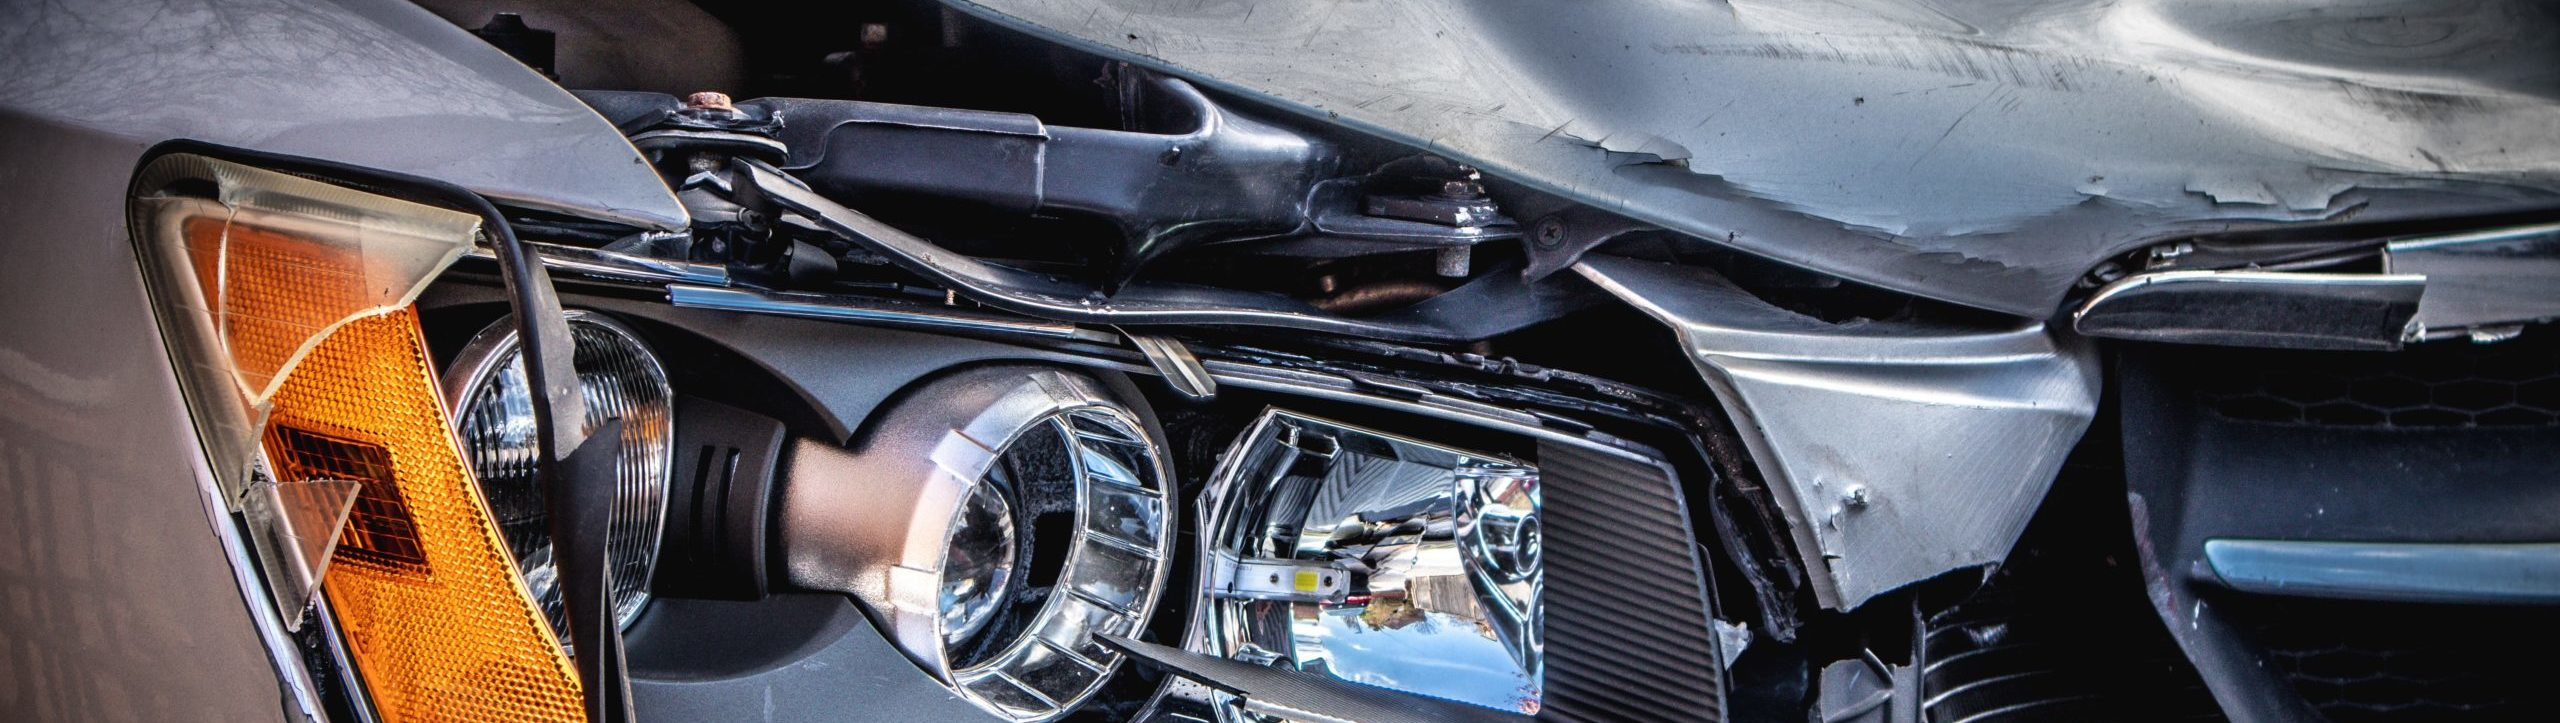

## BackGround

The number of traffic accidents has been a rising trend globally as there is an increase in population and the number of vehicles on road, and the consequence of this is loss of lives and injuries. Accidents are also a major cause of traffic congestion and identifying where and why the number of accidents is higher and why there are more severe accidents, helps in taking precautionary steps in better traffic management and this eventually helps in reducing the number of accidents.
Many factors are involved in traffic accidents and hence it is difficult to give a higher priority to any of the factors. But with a detailed understanding of traffic and environmental conditions better prediction of an incident can be made.

## Objective

The objective of the current project is to predict the severity class of the accident based on various environmental factors and location. The severity prediction can help improve the traffic safety and also can help to understand the reason for the accidents.
Severity in the dataset has been categorized into 3 classes: 1, 2 and 3 with 1 being least severe with the least impact on traffic and 3 being most severe with the highest impact on traffic. 

##  Data Source 

This data set is collected from Addis Ababa Sub city police departments for Masters research work. The data set has been prepared from manual records of road traffic accident of the year 2017-20. All the sensitive information have been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms algorithms.
PLease visit https://www.narcis.nl/dataset/RecordID/oai%3Aeasy.dans.knaw.nl%3Aeasy-dataset%3A191591 to see more about the dataset.
Or Access the Kaggle version of the dataset as *kaggle datasets download -d saurabhshahane/road-traffic-accidents*

## Loading Necessary Libraries and Datasets

### Importing necessary dependencies



In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import datetime
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


import missingno as msno

### Creating functions for future usages:

In this section we will put all the userdefined functions that we will be using in our model. 

Here, we will have a few smaller sections. Such as - 

* Specify Constants -  The constant variables or assigned values that will remain fixed throughout our entire project.
* Define functions - The user defined functions that we will be using throughout the project, just to make our code simpler.



#### Constants:

Our constants are as follows:


In [2]:
seed = 1000
testSize = 0.30

#### Functions :

In [3]:
## This function will help us to split the dataset into train data and test data. 
def splitTrainTest(X, y):
    return train_test_split(X, y, test_size=testSize, random_state=seed)

In [ ]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.
## This function is  

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


### Loading the dataset 

In [4]:
# nRowsRead = 10000
# specify 'None' if want to read whole file
# RTA Dataset.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('RTA Dataset.csv', delimiter=',')
df.dataframeName = 'RTA Dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 12316 rows and 32 columns


In [5]:
# X_rta = df1.drop(columns=['Accident_severity'])
# y_rta = df1['Accident_severity']

# X_train, X_test, y_train, y_test = splitTrainTest(X_rta, y_rta)

# print(X_train.shape)
# print(X_test.shape)

In [7]:
df1= df.sample(frac = 0.7, random_state = seed)### Training data
df2 = df.sample (frac = 0.3, random_state = seed )### Testing data

print("The shape of training data is", df1.shape)
print("The shape of test data is",df2.shape)

The shape of training data is (8621, 32)
The shape of test data is (3695, 32)


##### Few points to add here:

First of all, Why am I splitting the whole dataset even before anything? The answer is simple. As of my understanding, the testing dataset is not supposed to have all the data preprocessing when we will be deploying the original model in reality. Hence I will continue with only training dataset and then test the model on the testing dataset.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

So, we will strat with a high level overview of the dataset keeping the following points in mind.


#### Getting an overview of the dataset we have in hand

In this section we will try to look into 
* the column names, 
* data-types of each columns, 
* count of null values in each column,
* brief description of all the columns, and 
* count of unique values for each column ( of type object)


In [8]:
df1.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
5303   19:00:00      Sunday              31-50          Male   
8490    0:50:00      Sunday            Unknown        Female   
307    11:45:00    Saturday            Unknown        Female   
11104  13:00:00    Thursday           Under 18          Male   
407    15:31:00      Monday              31-50          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
5303   Junior high school                Employee         Above 10yr   
8490    Elementary school                Employee              2-5yr   
307     Elementary school                Employee         Above 10yr   
11104   Above high school                   Owner              1-2yr   
407    Junior high school                Employee             5-10yr   

      Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
5303       Automobile            Owner                  2-5yrs  ...   
8490             Taxi            Owner                  2-5yrs  ...   
307        Automobile            Owner                     NaN  ...   
11104      Motorcycle     Governmental                     NaN  ...   
407             Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
5303    Going straight       Pedestrian            Male              Over 51   
8490               NaN  Driver or rider          Female                    5   
307          Reversing               na              na                   na   
11104   Going straight               na              na                   na   
407          Reversing  Driver or rider          Female                31-50   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
5303                  3            Driver               Normal   
8490                  3            Driver               Normal   
307                  na     Self-employed               Normal   
11104                na            Driver               Normal   
407                   3            Driver               Normal   

      Pedestrian_movement           Cause_of_accident Accident_severity  
5303     Not a Pedestrian               No distancing     Slight Injury  
8490     Not a Pedestrian                       Other    Serious Injury  
307      Not a Pedestrian             Moving Backward     Slight Injury  
11104    Not a Pedestrian  Changing lane to the right     Slight Injury  
407      Not a Pedestrian               No distancing     Slight Injury  

[5 rows x 32 columns]

In [9]:
df1.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [10]:
df1.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [11]:
df1.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               507
Vehicle_driver_relation         386
Driving_experience              567
Type_of_vehicle                 640
Owner_of_vehicle                333
Service_year_of_vehicle        2700
Defect_of_vehicle              3104
Area_accident_occured           171
Lanes_or_Medians                270
Road_allignment                 101
Types_of_Junction               614
Road_surface_type               127
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               100
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                212
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 5303 to 5166
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         8621 non-null   object
 1   Day_of_week                  8621 non-null   object
 2   Age_band_of_driver           8621 non-null   object
 3   Sex_of_driver                8621 non-null   object
 4   Educational_level            8114 non-null   object
 5   Vehicle_driver_relation      8235 non-null   object
 6   Driving_experience           8054 non-null   object
 7   Type_of_vehicle              7981 non-null   object
 8   Owner_of_vehicle             8288 non-null   object
 9   Service_year_of_vehicle      5921 non-null   object
 10  Defect_of_vehicle            5517 non-null   object
 11  Area_accident_occured        8450 non-null   object
 12  Lanes_or_Medians             8351 non-null   object
 13  Road_allignment              8

In [13]:
# print duplicates
print("Number of duplicates: ", df1.duplicated().sum())
print("Unique values per column:")
df1.nunique()

Number of duplicates:  0
Unique values per column:


Time                           1031
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [14]:
df1.describe()

Number_of_vehicles_involved  Number_of_casualties
count                  8621.000000           8621.000000
mean                      2.037235              1.550632
std                       0.685366              1.015492
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

#### Observations so far:
WE can make a very broad observation of our dataset at this point.

* The dataset has 12316 rows and 32 columns.
* There are two numeric columns (viz, Number_of_vehicles_involved and Number_of_casualties) and 30 object columns.
* Number of vehicles invloved in a single road accident can vary from 1 to 7 causing casualties of 1 to 8 people in one accident.




#### Investigating the Target : 

For each combination of certain parameters in the test dataset, predicting how the severity of an accident will be affected is our ultimate objective. Hence Accident Severity is the target column in the dataset. Let's examine the Distribution of the target column

In [15]:
df1['Time'] = pd.to_datetime(df1['Time'])
### Extracting month 
# extracting hour and minute from timestamp
df1['hour'] = df1['Time'].dt.hour
df1['minute'] = df1['Time'].dt.minute
df1.drop('Time', axis=1, inplace=True)

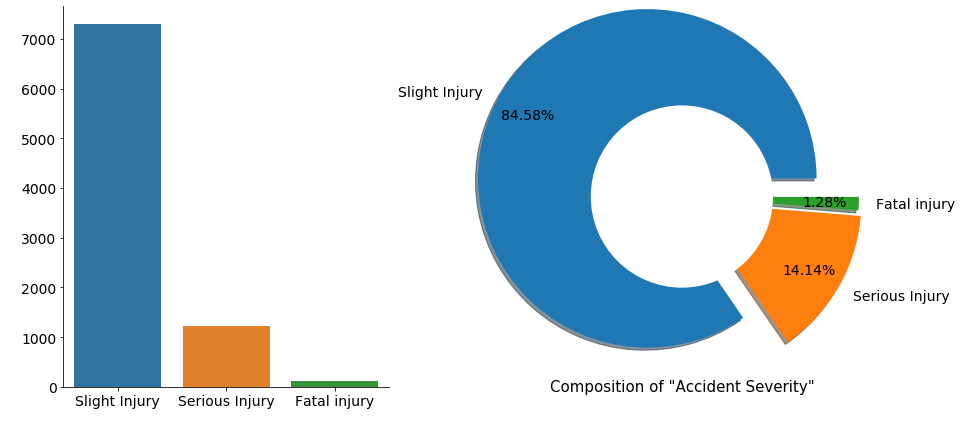

In [16]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df1["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df1["Accident_severity"].value_counts(),
        labels=list(df1["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14},
        explode = [0.3,0.09,0.06]
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [17]:
df1["Accident_severity"].value_counts()

Slight Injury     7292
Serious Injury    1219
Fatal injury       110
Name: Accident_severity, dtype: int64

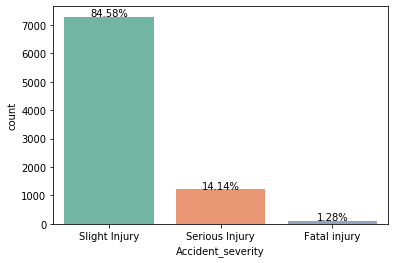

In [18]:
s = sns.countplot(x = 'Accident_severity',data = df1,palette="Set2")
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df1)*100),
            ha="center", fontsize=10) 

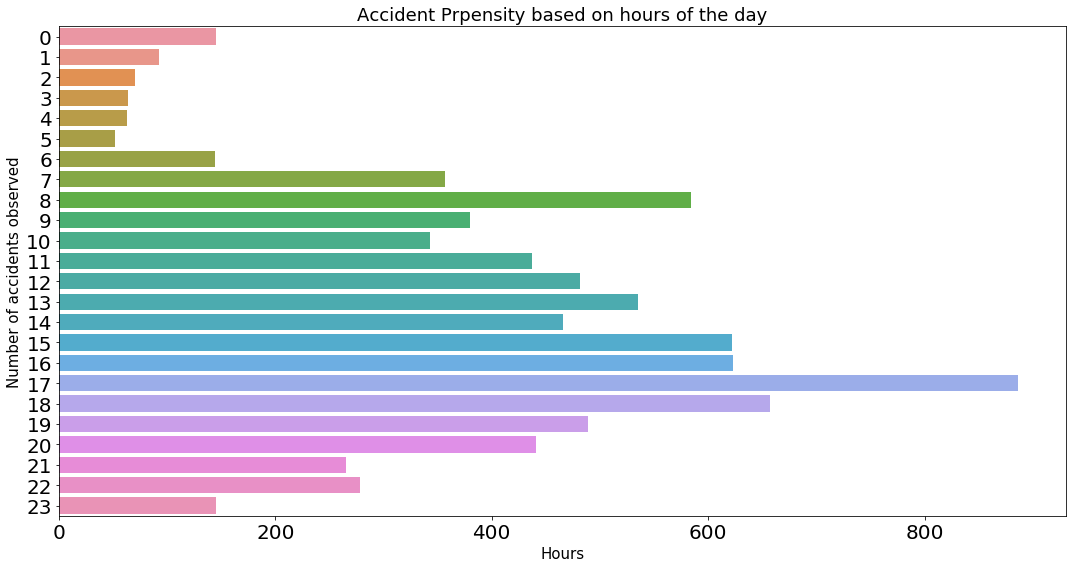

In [19]:
### We want to plot minutes and the corrresponding accidents
plt.figure(figsize=(15,8))
sns.countplot(data=df1, y='hour')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Accident Prpensity based on hours of the day', fontsize=18)
plt.xlabel('Hours',fontsize = 15)
plt.ylabel('Number of accidents observed',fontsize = 15)
plt.tight_layout()

#### What target column is telling??

* From the target column we can see that, most of the accident records report slight injury (84.56% of total reports), followed by serious injury and fatal injury. From this information, we see this is an imbalanced class problem. It is the problem in machine learning where the total number of a class of data (positive) is far less than the total number of another class of data (negative). 

* There is another thing that could be recognized that, most of the accidents occured during 5 pm in the afternoon and there is a sudden hique around 8 am in the morning. The reason could be these are generally rush hours as most of the working professionals and students commutes during this time.



#### Investigating columns other than Target 

Now we will move on exploring other columns for gathering more informations.

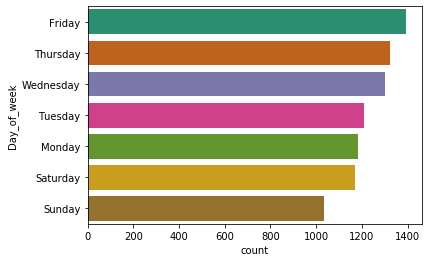

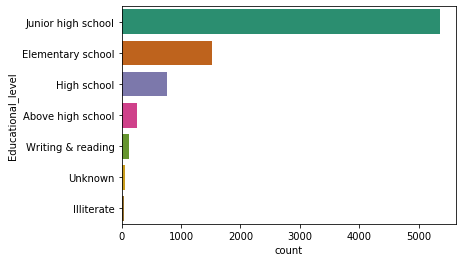

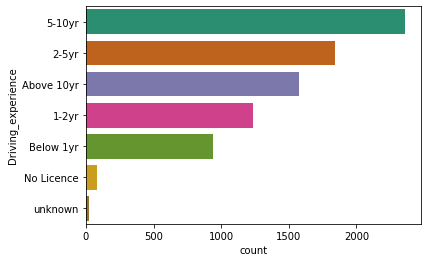

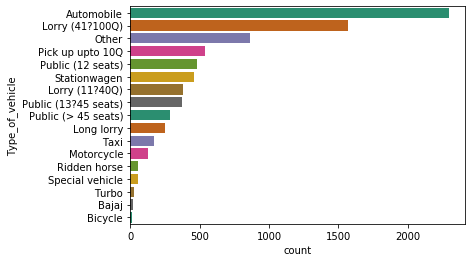

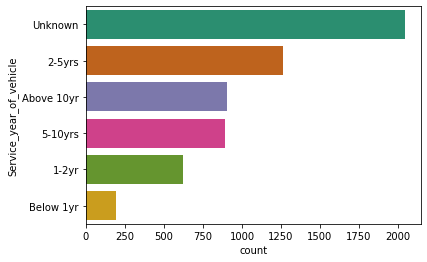

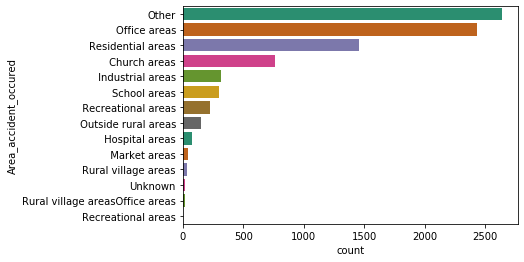

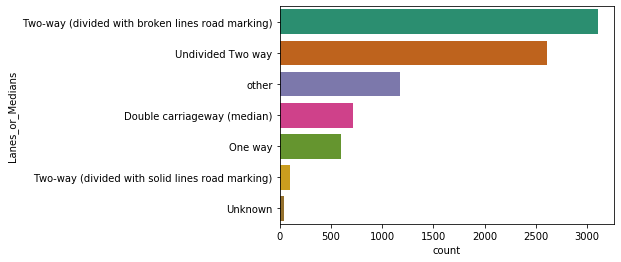

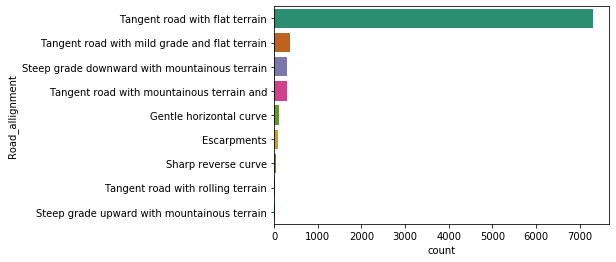

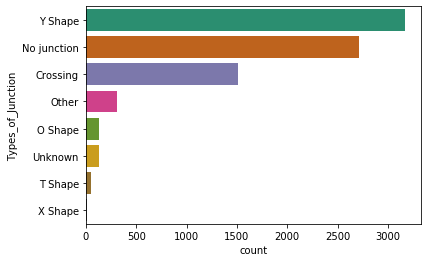

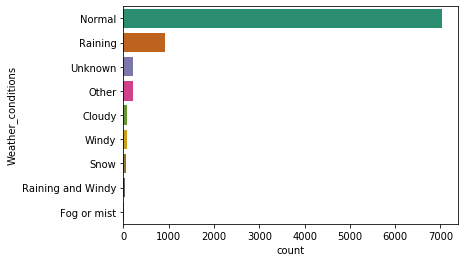

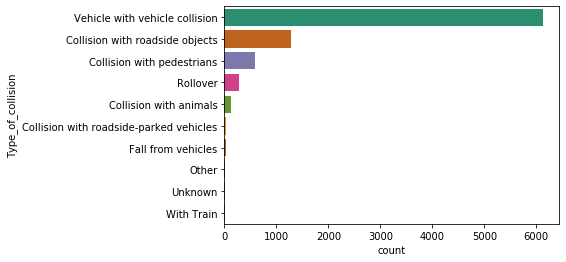

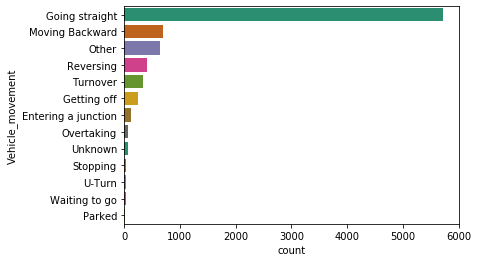

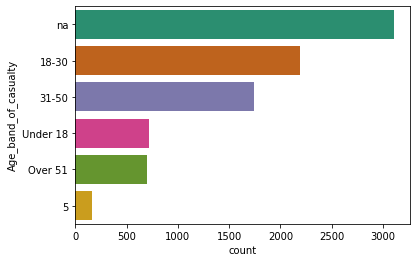

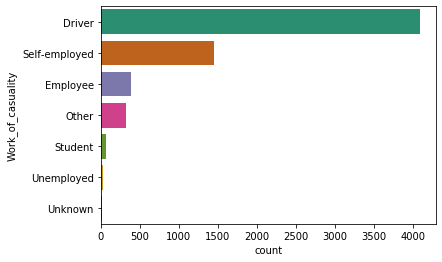

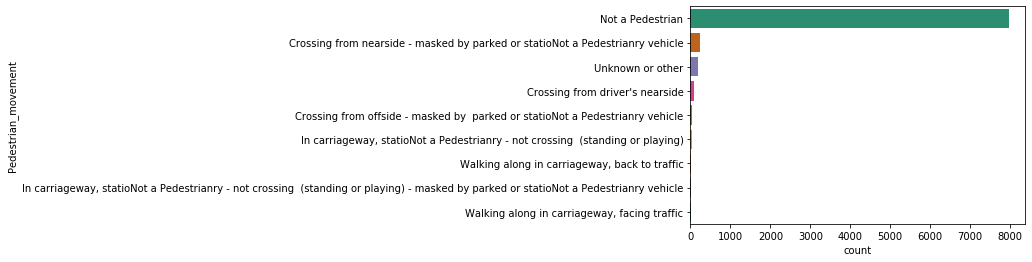

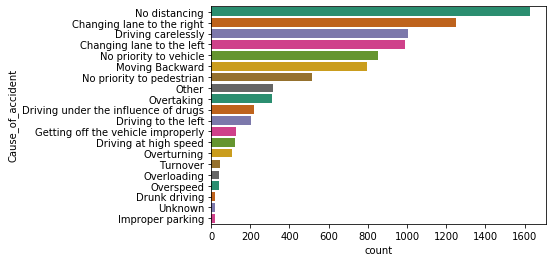

In [20]:
for col in df1.select_dtypes(include='object'):
    if (df1[col].nunique() >5 and df1[col].nunique()<= 22):
        sns.countplot(y=col, data=df1,orient="h",order = df1[col].value_counts().index,palette='Dark2')
        plt.show()

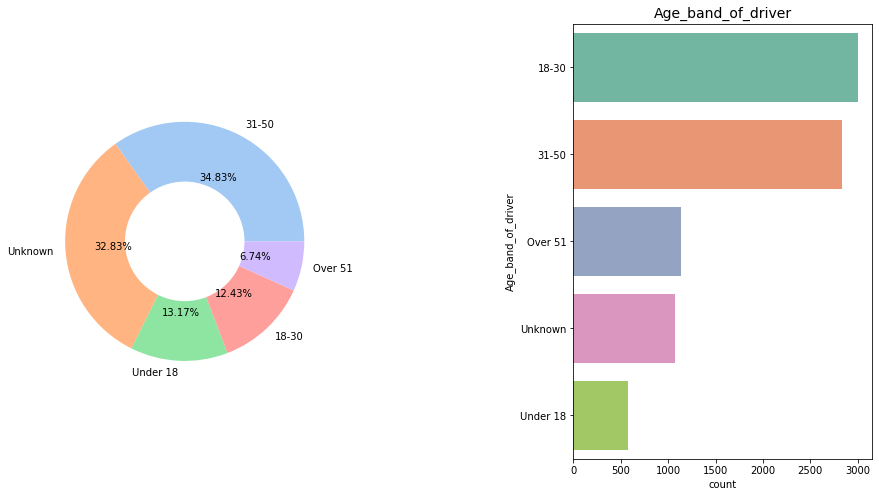

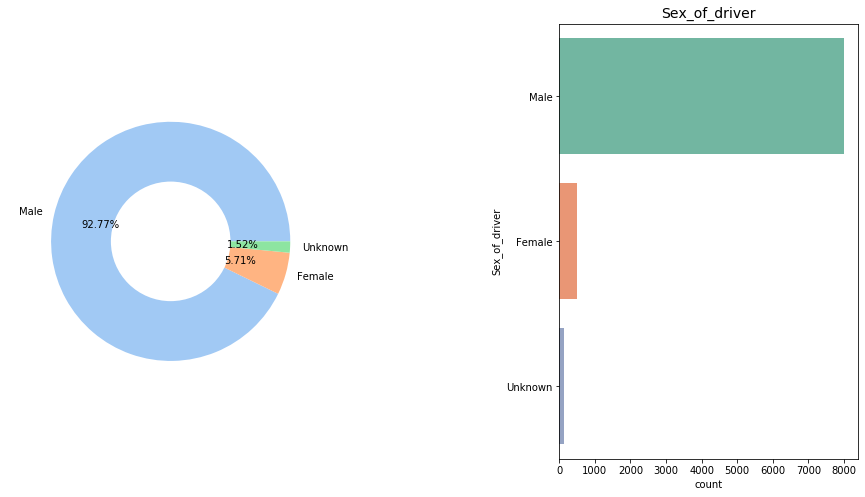

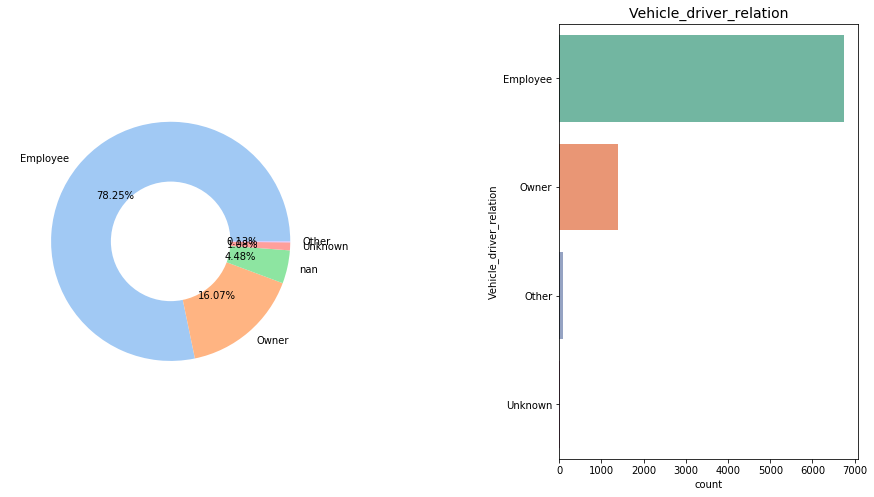

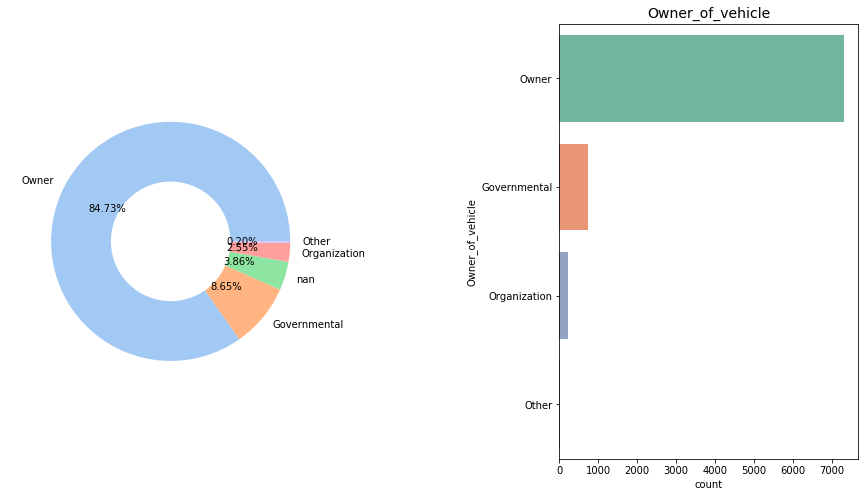

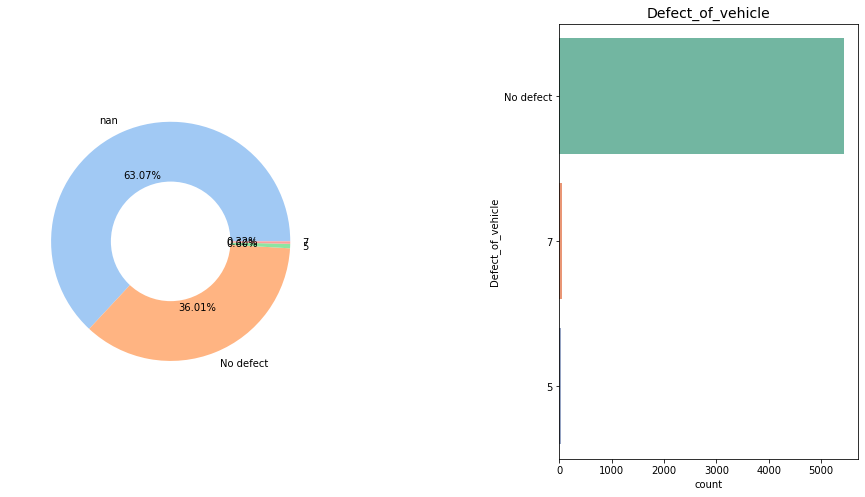

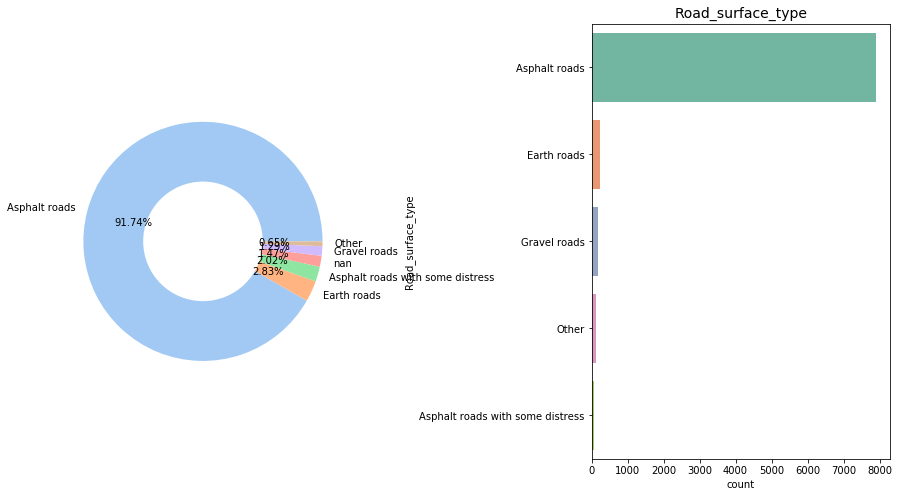

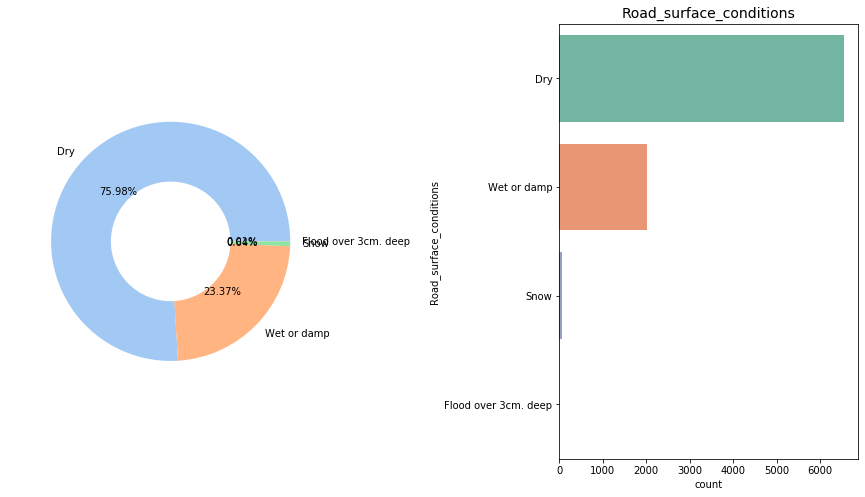

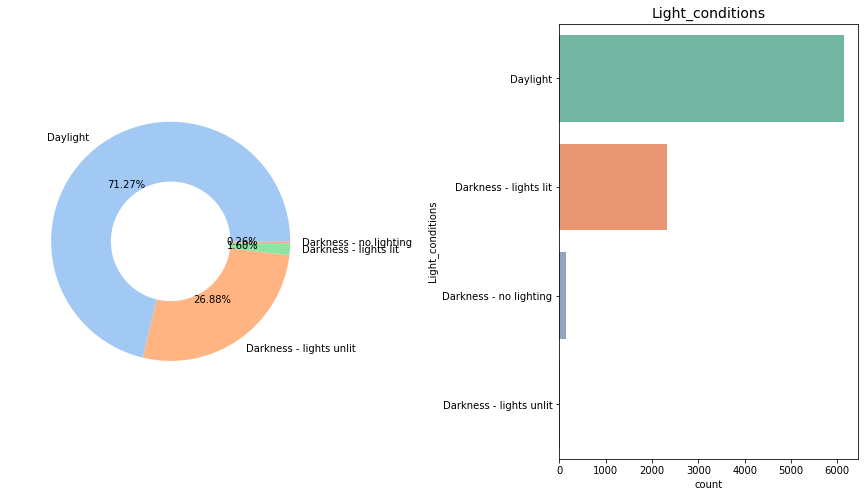

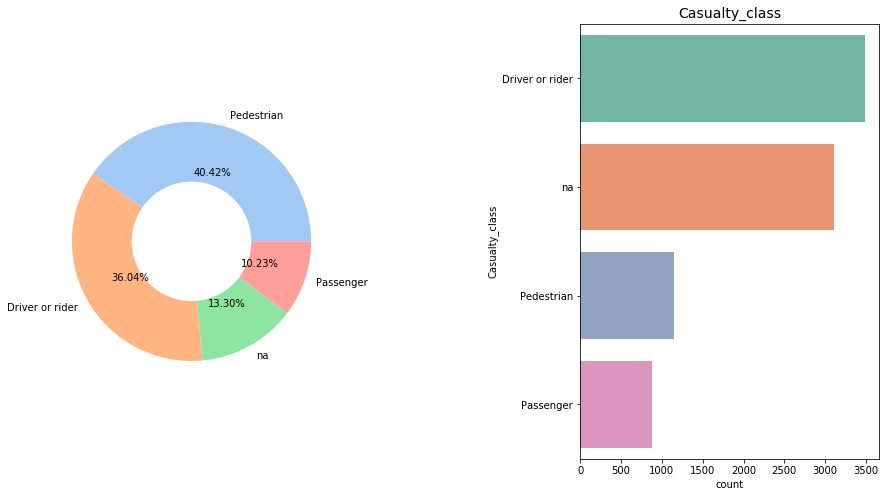

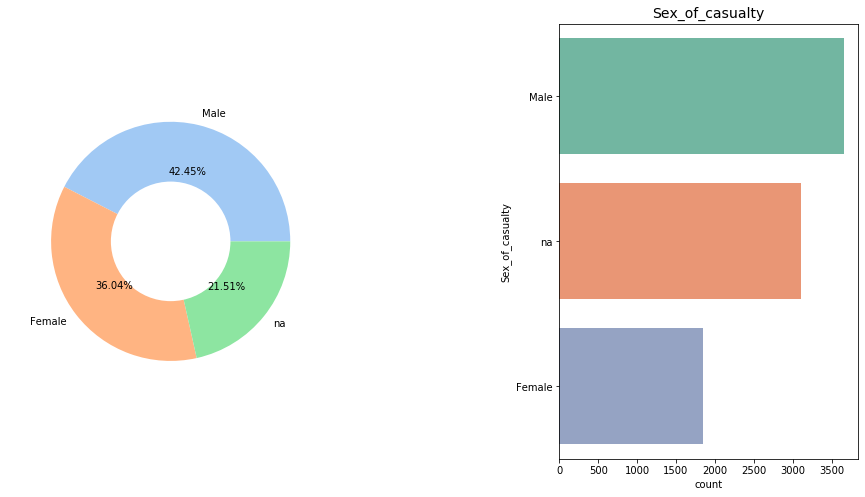

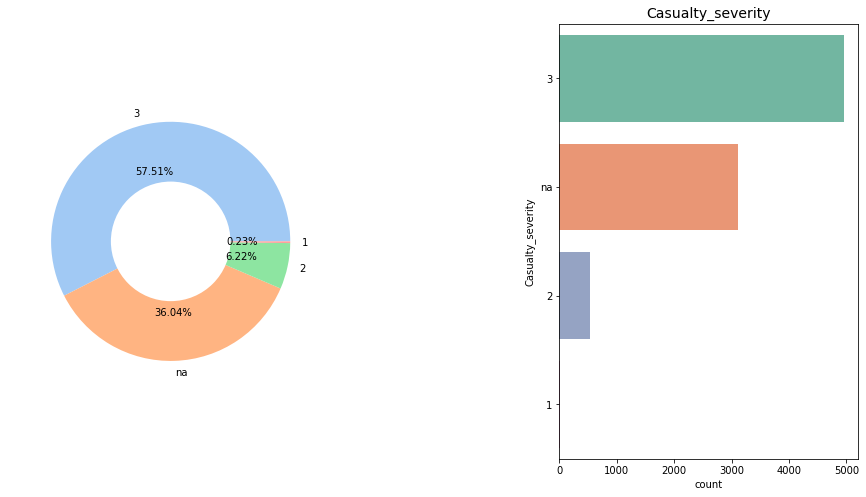

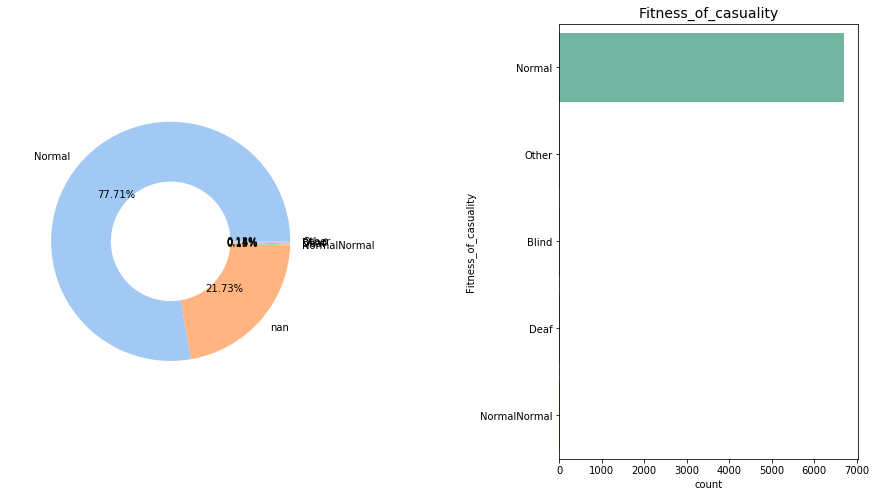

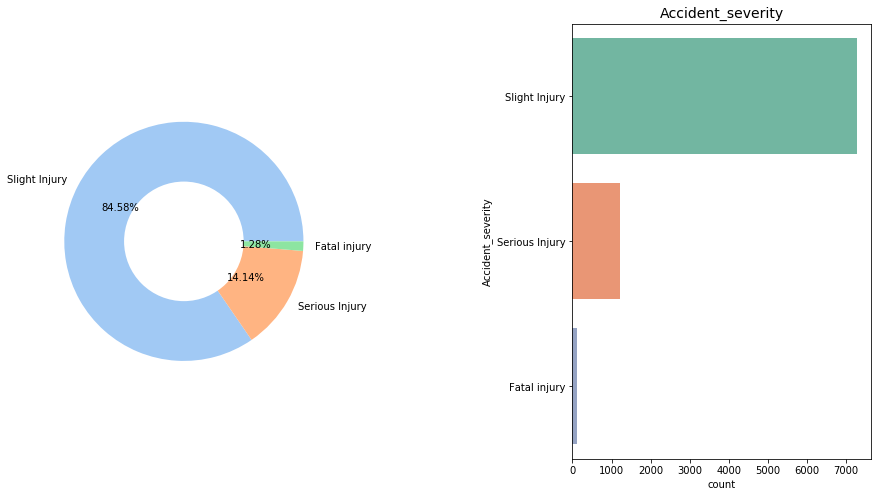

In [21]:
for col in df1.select_dtypes(include='object'):
    if (df1[col].nunique() <= 5):
        
        plt.figure(figsize=(15,8))
        ###For Dounut Chart 
        ax1 = plt.subplot(1,2,1)
        data = list(df1[col].value_counts(dropna=False).values)
        colors = sns.color_palette('pastel')
        labels = list(df1[col].unique())
        plt.pie(data, labels=labels,colors = colors,autopct='%1.2f%%')
        ax1.set_xlabel(" ")
        #draw circle
        centre_circle = plt.Circle((0,0),0.50,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        
        ### For barplot
        ax2 = plt.subplot(1,2,2)
        s = sns.countplot(y=col, data=df1,orient="v",order = df1[col].value_counts().index,palette='Set2')
        ax1.set_xlabel(" ")
        ax1.set_ylabel(" ")
        plt.title(col, fontsize=14)
        plt.subplots_adjust(wspace= 0.8)
        plt.show()

#### Insights fo far :

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

## Data Preprocessing:

Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models. The following works have been done on this method. 

* Missing value Treatment
* ...will add more methods as we go ...


### Missing Value Treatment :

Now we will move on to the missing values treatments.


In [23]:
train_missing =  missing_values_table(df1)
train_missing

Your selected dataframe has 33 columns.
There are 16 columns that have missing values.


Missing Values  % of Total Values
Defect_of_vehicle                  3104               36.0
Service_year_of_vehicle            2700               31.3
Work_of_casuality                  2271               26.3
Fitness_of_casuality               1873               21.7
Type_of_vehicle                     640                7.4
Types_of_Junction                   614                7.1
Driving_experience                  567                6.6
Educational_level                   507                5.9
Vehicle_driver_relation             386                4.5
Owner_of_vehicle                    333                3.9
Lanes_or_Medians                    270                3.1
Vehicle_movement                    212                2.5
Area_accident_occured               171                2.0
Road_surface_type                   127                1.5
Road_allignment                     101                1.2
Type_of_collision                   100                1.2

Now as we found the list of missing values in our training dataset, we will try to find out the reason for missing values here. 

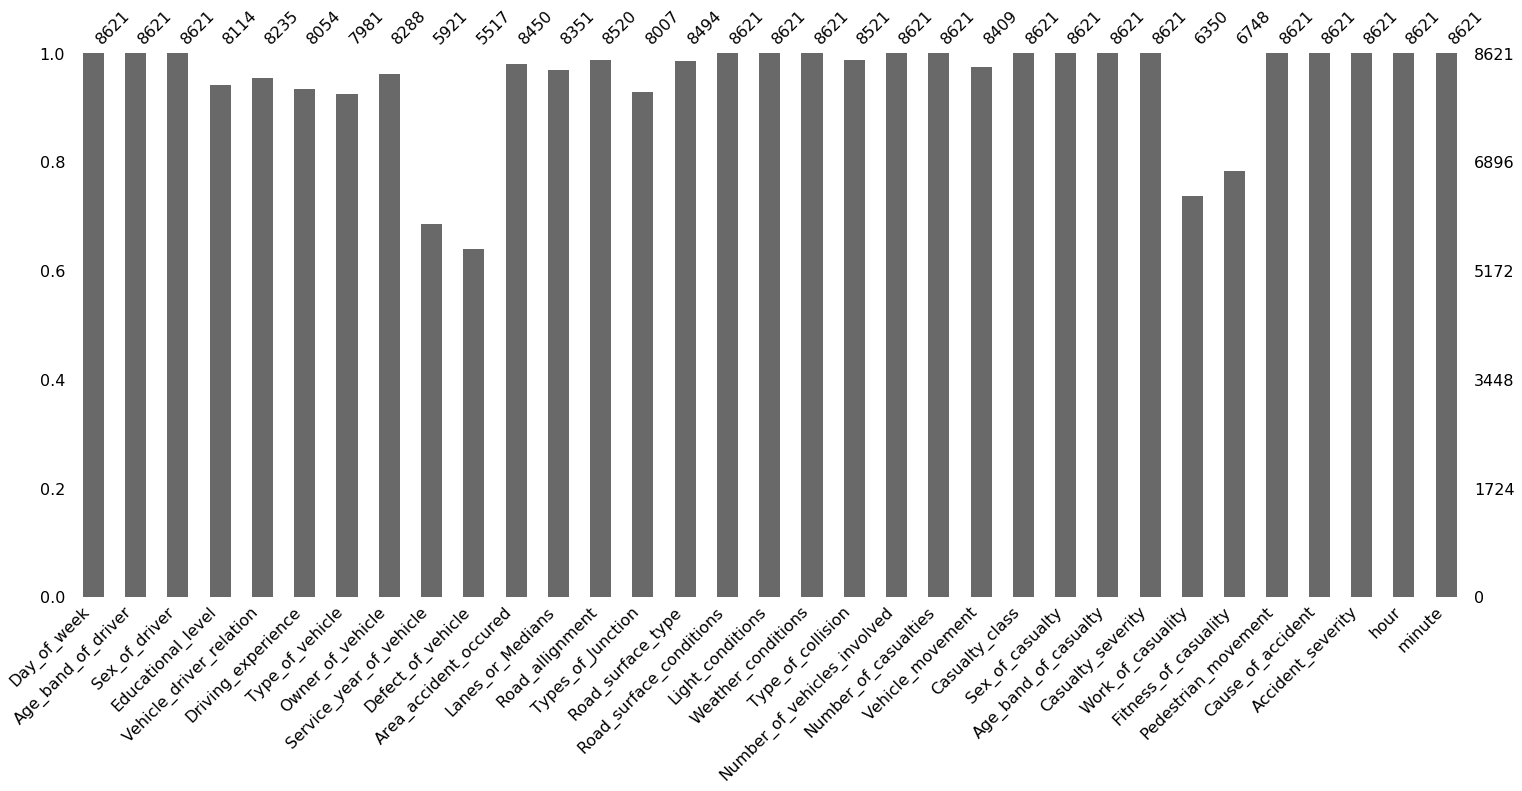

In [30]:
msno.bar(df1)

The above graph shows a quick graphical representaion of the completeness of the dataset. So it is clearly visible that all the columns that was reported before to have missing values are showing observation counts <8621. 

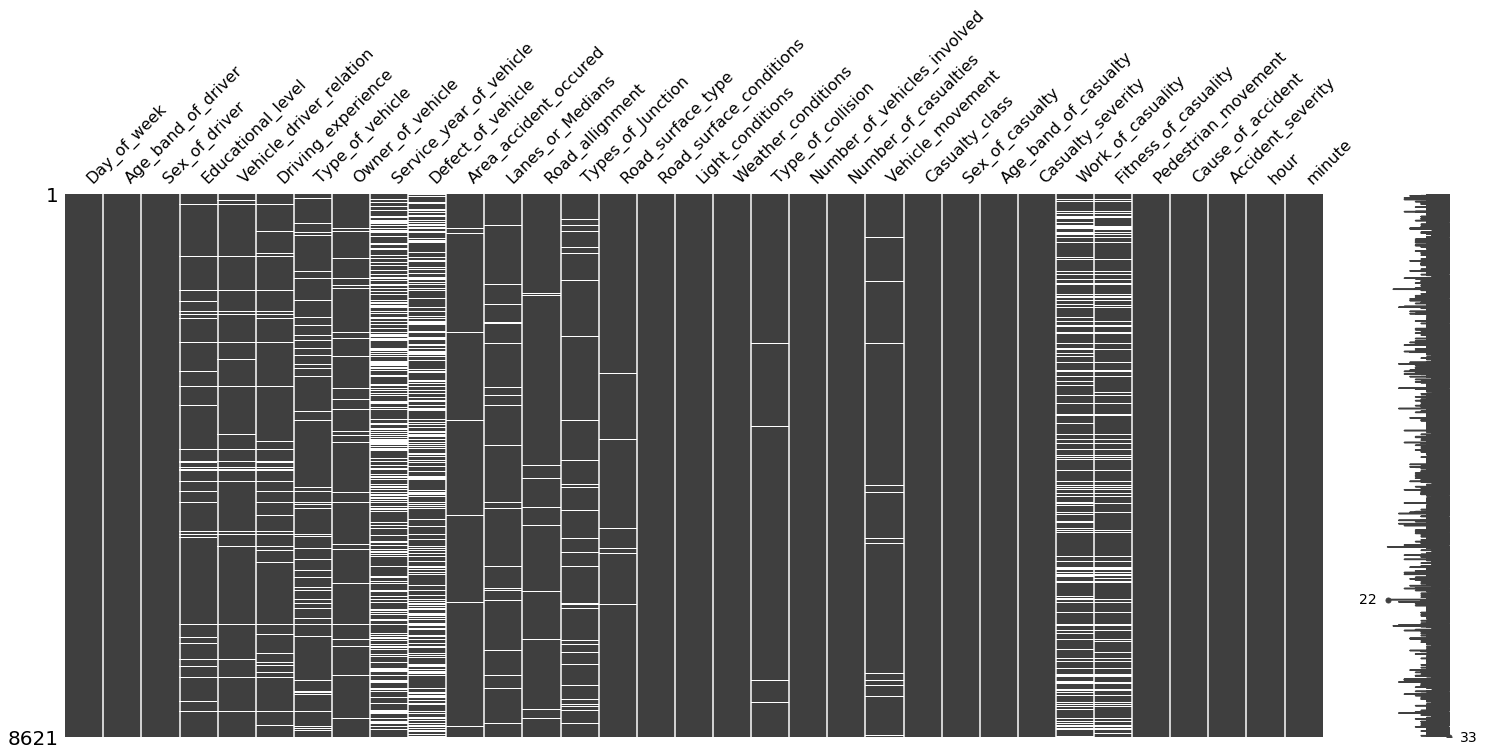

In [31]:
msno.matrix(df1)

* The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion. 

* The plot appears blank(white) wherever there are missing values. For instance, in Type of collision column there are only four instances of missing data, hence the four white lines.

* The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

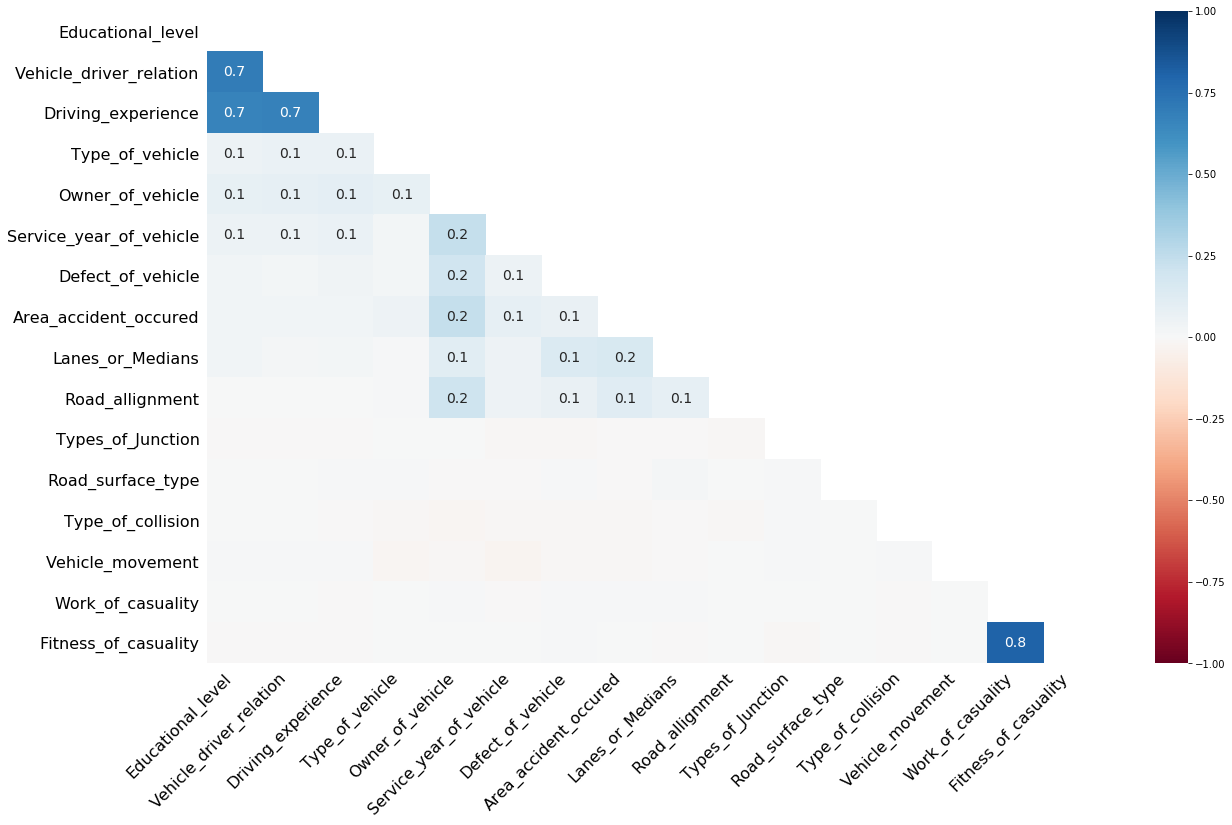

In [32]:
msno.heatmap(df1)